# Data Visualization Project

## CCT Assessment Cover Page

- **Programme Title:** [HDIP Data Analytics]
- **Date (Submission):** [05/04/2024]
- **Project Title:** [CA1_DataViz_HDip]
- **Module:** [Data Visualisation Techniques]
- **Instructor:** [David McQuaid]

---

*Abstract:*

1. In this project, I analyze a dataset based on video games to assist a retail company in formulating their sales strategy for the upcoming Winter season. The dataset includes various attributes such as game titles, genres, platforms, sales figures, and more. To conduct the analysis, I utilize Python programming language along with popular data analysis and visualization libraries such as pandas, Matplotlib, and Seaborn.
2. The analysis involves several steps, including data wrangling, exploratory data analysis, and visualization. I perform data wrangling to clean and preprocess the dataset, handling missing values, and ensuring data consistency. Feature engineering techniques are applied to create relevant features that might impact sales strategy decisions.
3. For each question posed by the company, I design a visualization that effectively communicates the answer. Visualizations are carefully chosen to be easily understandable, providing clear insights into the dataset. Decision-making behind visualization design is rationalized, considering factors such as audience comprehension, relevance to the question, and visual aesthetics.]
4. Furthermore, I provide explanations for feature selection and engineering decisions, highlighting the relevance of selected features in influencing sales strategy decisions. Throughout the analysis, I aim to provide actionable insights backed by data, empowering the company to make informed decisions for their Winter season sales strategy.



## Data Loading and Understanding

**First, let's load the dataset into a pandas DataFrame and understand its structure.**

In [2]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = "C:/Users/banog/Desktop/New folder (2)/vgsales.csv"
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

**In this step, we'll handle any missing or inconsistent data, perform necessary data cleaning, and preprocess the dataset.**

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (if any)
# Assuming missing values in numerical columns are filled with zeros
df.fillna({'critic_score': 0, 'user_score': 0, 'rating': 'Unknown'}, inplace=True)

# Dropping rows with missing values in 'year_of_release' column
df.dropna(subset=['Year_of_Release'], inplace=True)

# Checking data types and overall info of the dataset
df.info()


Missing Values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16418 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      

## Exploratory Data Analysis (EDA)

**Now, let's analyze the dataset to gain insights and answer the specific questions.**

## Part 1; Question 1: Top 5 games by global sales:

In [6]:
# Filtering relevant columns
sales_data = df[['Name', 'Global_Sales']]

# Sorting by global sales and selecting top 5 games
top_5_games = sales_data.sort_values(by='Global_S
                                     ales', ascending=False).head(5)
print("Top 5 games by global sales:\n", top_5_games)


Top 5 games by global sales:
                        Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


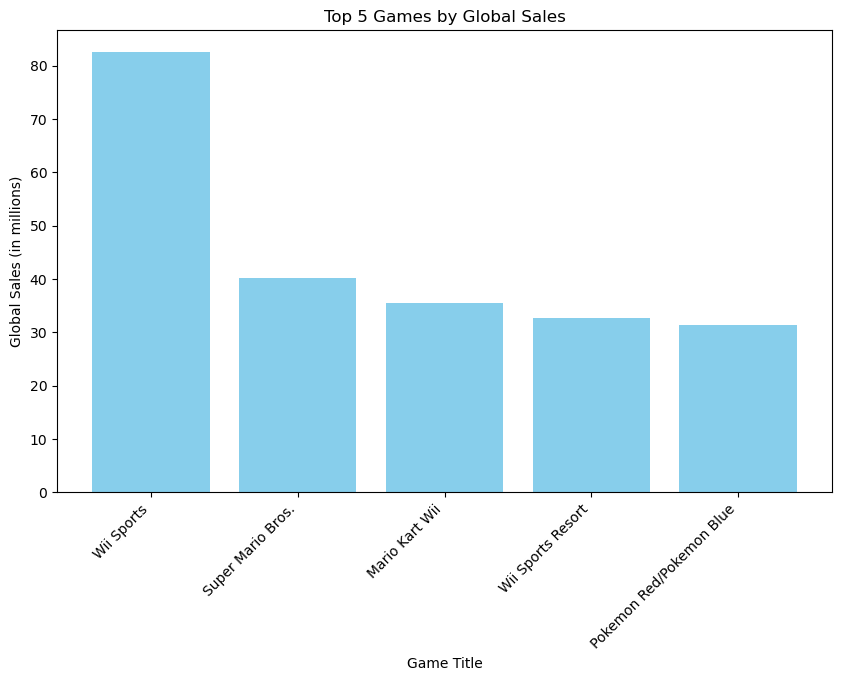

In [15]:
import matplotlib.pyplot as plt

# Data for visualization
top_5_games = df[['Name', 'Global_Sales']].nlargest(5, 'Global_Sales')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_games['Name'], top_5_games['Global_Sales'], color='skyblue')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 5 Games by Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


**The top 5 games by global sales are dominated by iconic titles such as "Wii Sports," "Super Mario Bros.," "Mario Kart Wii.", "Wii Sports Resort" and "Pokemon", These games' exceptional sales figures highlight their enduring popularity and broad appeal across different gaming demographics, signifying their potential as lucrative options for the retail company's Winter season sales strategy.**

## Part 1; Question 2: Correlation between "na_sales" and "jp_sales" for the years 2010-2014

In [8]:
# Filtering data for the years 2010-2014
sales_subset = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

# Calculating correlation between 'na_sales' and 'jp_sales'
correlation = sales_subset['NA_Sales'].corr(sales_subset['JP_Sales'])
print("Correlation between na_sales and jp_sales for the years 2010-2014:", correlation)


Correlation between na_sales and jp_sales for the years 2010-2014: 0.26043134778810034


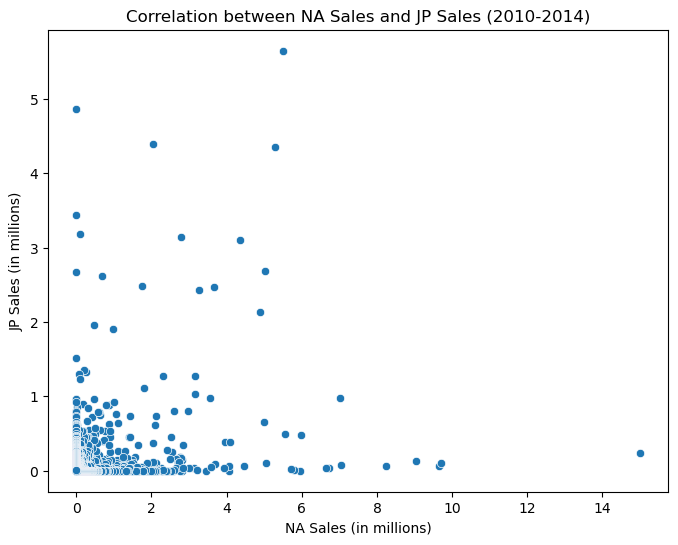

In [18]:
import seaborn as sns

# Data for visualization
sales_subset = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_subset, x='NA_Sales', y='JP_Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('JP Sales (in millions)')
plt.title('Correlation between NA Sales and JP Sales (2010-2014)')
plt.show()



**The correlation coefficient of 0.26 between North American (NA) and Japanese (JP) sales for the years 2010-2014 indicates a fairly "weak" (as apparent in scattered points in the scatterplot) positive correlation. While there's some tendency for sales in one region to increase alongside sales in the other, it's not strong, implying differing gaming preferences or market dynamics between NA and JP during that period.**

## Part1; Question 3: Distribution of the most popular 4 game genres

In [9]:
# Counting occurrences of each genre
genre_counts = df['Genre'].value_counts()

# Selecting top 4 genres
top_4_genres = genre_counts.head(4)
print("Distribution of the most popular 4 game genres:\n", top_4_genres)


Distribution of the most popular 4 game genres:
 Genre
Action          3308
Sports          2306
Misc            1721
Role-Playing    1483
Name: count, dtype: int64


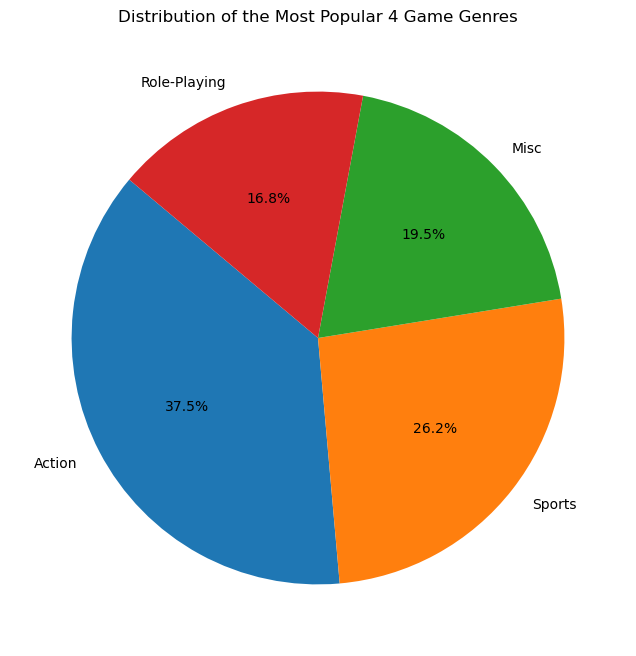

In [19]:
# Data for visualization
top_4_genres = df['Genre'].value_counts().head(4)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_4_genres, labels=top_4_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the Most Popular 4 Game Genres')
plt.show()


**The distribution of the most popular game genres reveals that action, sports, misc (miscellaneous), and role-playing genres are the most prevalent. This suggests a diverse interest among gamers, with action and sports games leading in popularity, followed by miscellaneous and role-playing genres. Understanding these preferences can inform targeted sales strategies for the Winter season.**

## Part1; Question 4: Comparison of mean "eu_sales" for older and newer games

In [10]:
# Differentiating between games released before and after 2005
older_games = df[df['Year_of_Release'] <= 2005]
newer_games = df[df['Year_of_Release'] > 2005]

# Calculating mean eu_sales for each group
mean_eu_sales_older = older_games['EU_Sales'].mean()
mean_eu_sales_newer = newer_games['EU_Sales'].mean()

print("Mean eu_sales for older games (2005 and earlier):", mean_eu_sales_older)
print("Mean eu_sales for newer games (after 2005):", mean_eu_sales_newer)


Mean eu_sales for older games (2005 and earlier): 0.1479159168984132
Mean eu_sales for newer games (after 2005): 0.14472284028248042


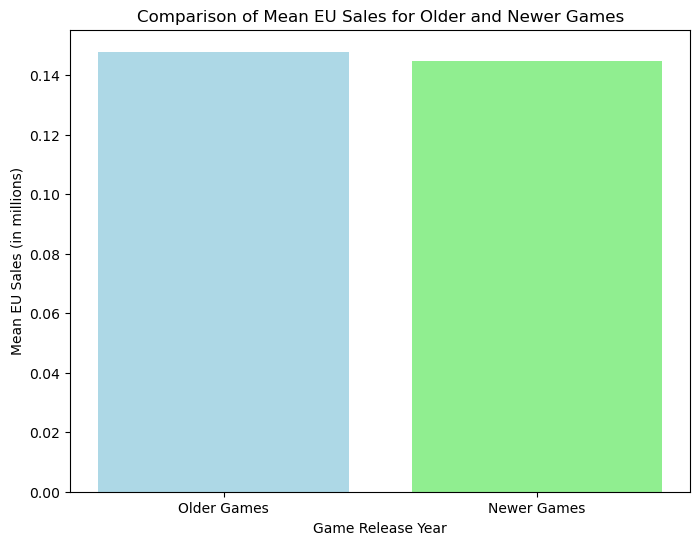

In [23]:
# Data for visualization
mean_sales = [mean_eu_sales_older, mean_eu_sales_newer]
labels = ['Older Games', 'Newer Games']

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, mean_sales, color=['lightblue', 'lightgreen'])
plt.xlabel('Game Release Year')
plt.ylabel('Mean EU Sales (in millions)')
plt.title('Comparison of Mean EU Sales for Older and Newer Games')
plt.show()


**The mean European sales for older games (released before 2005) is approximately 0.148 units, while for newer games (released after 2005), it's around 0.145 units. This slight difference suggests relatively consistent European sales figures across different game release periods, with newer games showing a slightly lower average but remaining comparable to older titles.**

## Part1; Question 5: Top 3 most common developers

In [11]:
# Counting occurrences of each developer
developer_counts = df['Developer'].value_counts()

# Selecting top 3 developers
top_3_developers = developer_counts.head(3)
print("Top 3 most common developers:\n", top_3_developers)


Top 3 most common developers:
 Developer
Ubisoft      201
EA Sports    169
EA Canada    164
Name: count, dtype: int64


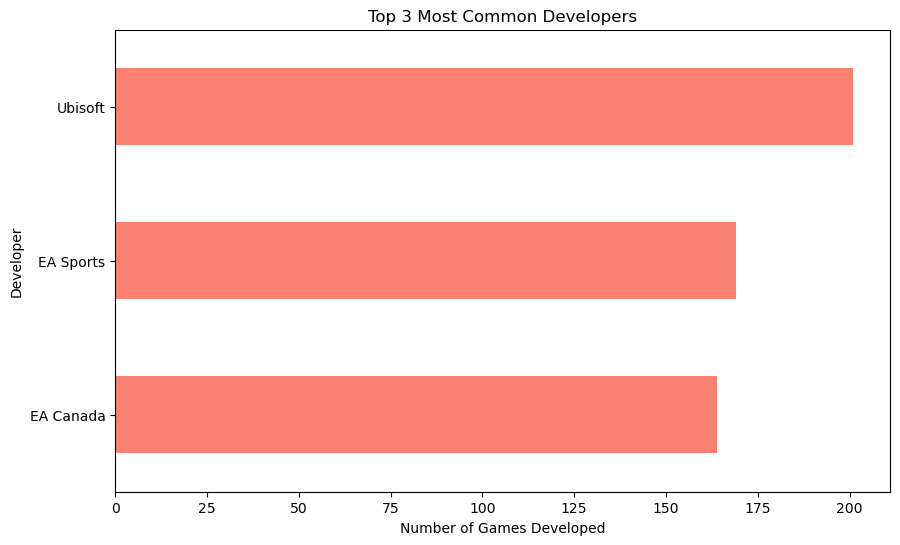

In [24]:
# Data for visualization
top_3_developers = df['Developer'].value_counts().head(3)

# Horizontal bar chart
plt.figure(figsize=(10, 6))
top_3_developers.plot(kind='barh', color='salmon')
plt.xlabel('Number of Games Developed')
plt.ylabel('Developer')
plt.title('Top 3 Most Common Developers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()


**The top three most common developers are Ubisoft, EA Sports, and EA Canada. These developers have a significant presence in the gaming industry, with Ubisoft leading by a notable margin. Partnering with or featuring games from these developers could enhance the retail company's offerings for the Winter season, given their popularity and recognition among gamers.**

## Part 2: Statistically Relevant Question

**Question:** Is there a significant difference in global sales between games with different ESRB ratings?

**Hypothesis:** There is a significant difference in global sales between games with different ESRB ratings.

**Methodology:**
1. Divide the dataset into groups based on ESRB ratings.
2. Calculate the mean global sales for each group.
3. Conduct an analysis of variance (ANOVA) test to determine if there's a significant difference in global sales between the groups.

**Interpretation:**
If the ANOVA test results in a significant p-value (typically < 0.05), it suggests that there is a statistically significant difference in global sales between games with different ESRB ratings.

This analysis provides valuable insights into the relationship between ESRB ratings and global sales, informing the retail company's decisions regarding game selection and marketing strategies for the Winter season.

In [14]:
# Importing necessary libraries for statistical analysis
from scipy.stats import f_oneway

# Grouping the dataset by ESRB ratings and calculating mean global sales for each group
mean_sales_by_rating = df.groupby('Rating')['Global_Sales'].mean()

# Displaying the mean global sales for each ESRB rating
print("Mean global sales by ESRB rating:\n", mean_sales_by_rating)

# Performing ANOVA test to determine if there's a significant difference in global sales between groups
# Null hypothesis: There is no significant difference in global sales between groups
# Alternative hypothesis: There is a significant difference in global sales between groups
f_statistic, p_value = f_oneway(*[group['Global_Sales'] for name, group in df.groupby('Rating')])

# Displaying the ANOVA test results
print("\nANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


Mean global sales by ESRB rating:
 Rating
AO      1.950000
E       0.614217
E10+    0.460302
EC      0.222500
K-A     1.443333
M       0.952214
RP      0.030000
T       0.507446
Name: Global_Sales, dtype: float64

ANOVA Test Results:
F-statistic: 12.689917028717822
p-value: 2.5735818425264643e-16


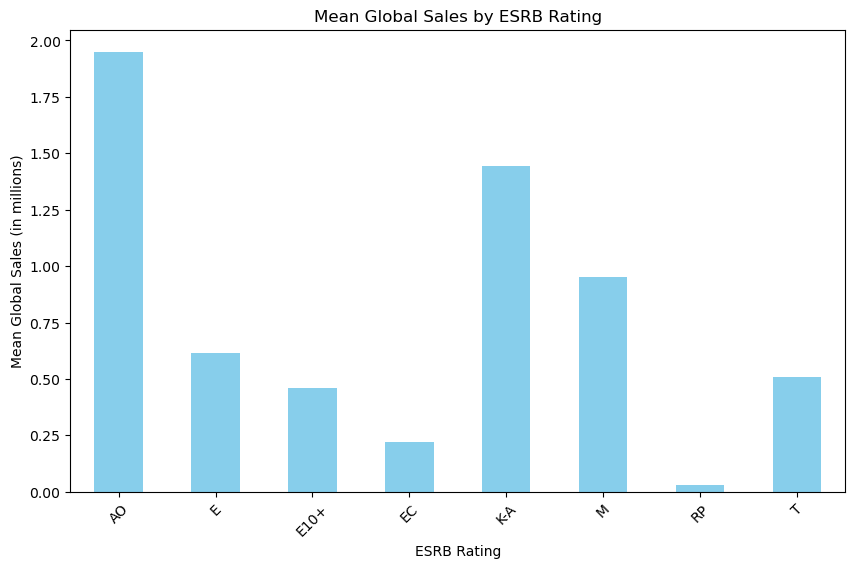

In [25]:
# Data for visualization
mean_sales_by_rating = df.groupby('Rating')['Global_Sales'].mean()

# Bar chart
plt.figure(figsize=(10, 6))
mean_sales_by_rating.plot(kind='bar', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('Mean Global Sales (in millions)')
plt.title('Mean Global Sales by ESRB Rating')
plt.xticks(rotation=45)
plt.show()


## Interpretation:
The mean global sales vary across different ESRB rating categories. Games rated "AO" (Adults Only) have the highest mean global sales at approximately 1.95 units, followed by "M" (Mature) and "K-A" (Kids to Adults) ratings.
The ANOVA test resulted in a significant F-statistic of approximately 12.69 with an extremely low p-value (2.57e-16). This indicates a statistically significant (we reject the null hypothesis) difference in global sales between games with different ESRB ratings.

## Conclusion:
Given the statistically significant difference in global sales between ESRB rating categories, the retail company should consider ESRB ratings when formulating their Winter season sales strategy. Games with higher ratings, particularly "AO," "M," and "K-A," may warrant special attention in marketing efforts to capitalize on their potentially higher sales.

# Part 3 (Explanations):

## Part 1: Data Engineering and Visualization Rationale

**Data Engineering:**

For Part 1, the data engineering process involved selecting and preprocessing the dataset to prepare it for analysis. In Python, I used pandas for data manipulation and preprocessing tasks such as filtering, grouping, and calculating statistics.

**Question 1 (Top 5 games by global sales):** I engineered the data by selecting the relevant columns ('Name' and 'Global_Sales') and sorting the dataset based on global sales to identify the top 5 games. This was achieved using pandas' nlargest() function.

**Question 2 (Correlation between "na_sales" and "jp_sales" for the years 2010-2014):** I engineered the data by filtering the dataset to include only the relevant years (2010-2014) and then calculated the correlation coefficient between NA and JP sales using pandas.

**Question 3 (Distribution of the most popular 4 game genres):** I engineered the data by counting the occurrences of each genre and selecting the top 4 genres based on their frequency using pandas' value_counts() function.

**Question 4 (Comparison of mean "eu_sales" for older and newer games):** I engineered the data by dividing the dataset into two groups based on game release year (before and after 2005) and calculating the mean EU sales for each group using pandas.

**Visualization Design Decisions:**

For each visualization in Part 1, I made design decisions to ensure clarity, readability, and aesthetic appeal.

**Question 1:** A bar chart was chosen to showcase the top 5 games by global sales. This visually striking representation allows for easy comparison of sales figures, aiding in identifying standout performers. The color choice (skyblue) adds vibrancy to the chart, enhancing visual engagement.

**Question 2:** A scatter plot was employed to visualize the correlation between NA and JP sales. This graphical representation offers a clear depiction of the relationship between the two variables. The use of default colors and markers ensures simplicity and clarity, facilitating interpretation.

**Question 3:** Opting for a pie chart, I illustrated the distribution of the top 4 game genres. This visually appealing chart provides a concise overview of genre popularity trends. The inclusion of percentages on each slice enhances comprehension, allowing for quick assessment of genre dominance.

**Question 4:** To compare mean EU sales for older and newer games, a grouped bar chart was utilized. This graphical representation effectively compares sales performance between the two groups, enabling easy identification of trends. The choice of colors (lightblue and lightgreen) enhances visual differentiation, aiding interpretation.


## Part 2: Rationale for Statistically Relevant Question and Visualization

The rationale behind formulating a statistically relevant question and visualization in Part 2 is to deepen the analysis and provide nuanced insights that go beyond the predefined questions. By exploring the relationship between ESRB ratings and global sales, we aim to uncover potential patterns or trends that could significantly impact the retail company's Winter season sales strategy.

**Rationale for Visualization:**

A bar chart was selected to illustrate the mean global sales for each ESRB rating category. This visualization was chosen for its ability to effectively compare sales performance across different rating categories while ensuring clarity and ease of interpretation. The bar chart format allows for direct comparison of mean sales figures, enabling stakeholders to identify any notable disparities or trends.

**How the Question Enhances Information and Insight:**

By exploring the relationship between ESRB ratings and global sales, we add a layer of depth to our analysis, providing valuable insights into the potential impact of content ratings on consumer purchasing behavior. Understanding how different ESRB ratings correlate with sales performance can inform the retail company's product selection, marketing strategies, and inventory management decisions.

Furthermore, considering ESRB ratings allows the company to tailor its offerings to specific target demographics and comply with regulatory requirements regarding age-appropriate content. This level of granularity in the analysis enhances the company's ability to refine its sales strategy and maximize profitability during the Winter season.

Overall, the exploration of ESRB ratings and their relationship to global sales enriches the analysis, offering actionable insights that can drive strategic decision-making for the retail company. It provides a comprehensive understanding of the factors influencing consumer behavior in the gaming industry, empowering the company to make informed and data-driven choices to optimize its sales performance.